# Baseball Data Investigation
## Introduction
This project serves as an introduction into data analytics by integrating Python packages such as Pandas and Numpy to wrangle, analyze, and interpret data. The dataset used include various files that represent the batting and pitching statistics of baseball players from 1871-2016 as well as corresponding salary data from 1985-2016. Coming from a baseball background myself, I had always found the statistical underpinnings of baseball to be fascinating. I decided to look at the dataset from both sides of the baseball by analyzing both hitting and pitching statistics. From the hitter's perspective, I explored one of the endless aphorisms passed down from generations of baseball. Furthermore, when I played growing up, I was a starting pitcher, and this compelled me to do some additional analysis on starting pitchers and what makes them valuable. Of course, value is a subjective metric, but can be tied to the salary of the pitcher without much mental effort. With this line of reasoning, I posed the following two questions:

- 1.Power hitters swing for the fences and are thus more likely to strike out. Alternatively, contact hitters strike out less since they only focus on hitting the ball. Does this widely accepted tenet of baseball hold true. *

- 2.What pitching statistics make a starting pitcher most valuable over the past 30 years?*

## Data Wrangling Phase
### Data Wrangling of Batting Data
Data wrangling was done in two parts as the two questions that were posed involved entirely different statistics within the dataset. In order to answer the first question, it was first necessary to import the batting data, which is within its own csv file. At first I attempted to include all of the data from 1871-2016 to have a more robust dataset, but there seemed to be several missing data points for the number of strikeouts for each player pre-1913 and thus only included years past or including 1913. This was essentially the only step necessary to filter out the batting data before the exploration phase began.

# Importing Libraries

In [3]:
#For numerical computation
import numpy as np
#For data Manipulation
import pandas as pd
import scipy
import sklearn
import seaborn as sns
#Used for data visualisation purpose.
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

In [4]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [5]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [145]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor



from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Data Analysis Phase

## 1.Reading data frame

In [6]:
df = pd.read_csv("baseball.csv")

In [7]:
df.shape

(30, 17)

### In our dataset total  30 rows and 17 Columns

In [8]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [9]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [10]:
df.sample(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
19,64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
14,68,694,5600,1405,277,46,146,475,1119,78,729,664,4.14,5,15,28,126
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [11]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

## Checking the datatype of every feature

In [14]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [17]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [19]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

In [20]:
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [21]:
df.shape

(30, 17)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

## Checking five number summery of data

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


## Observation:
Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0

In [28]:
df.isna().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

In [20]:
df['Total Bags'].unique()

array([ 8696.87,  9505.56,  8145.35, ..., 63931.73, 69104.56,      nan])

In [26]:
df.nunique()

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut Outs             12
Saves                 20
Errors                21
dtype: int64

- To check the number of null values in the dataset columns

In [21]:
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

## Observation
- Since all the missing values are uniform.


- Now delete the row which has all the nan value present in that row

In [36]:
df.shape

(30, 17)

In [32]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

## Observation
- There is no such row which has all the missing values 
- Now our dataframe is nullfree


# Scatterplot

In [ ]:
sns.pairplot(df, hue="Wins")

## 1.Checking Numerical Variable

In [37]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [38]:
numerical_features

['Wins',
 'Runs Scored',
 'At Bat',
 'Hits',
 'Doubles',
 'Triples',
 'Home Runs',
 'Base on Balls',
 'Strike Outs',
 'Stolen Base',
 'Runs Average',
 'Earned Runs',
 'Earned Run Average',
 'Complete Game',
 'Shut Outs',
 'Saves',
 'Errors']

### 1.1 Checking Data Distribution

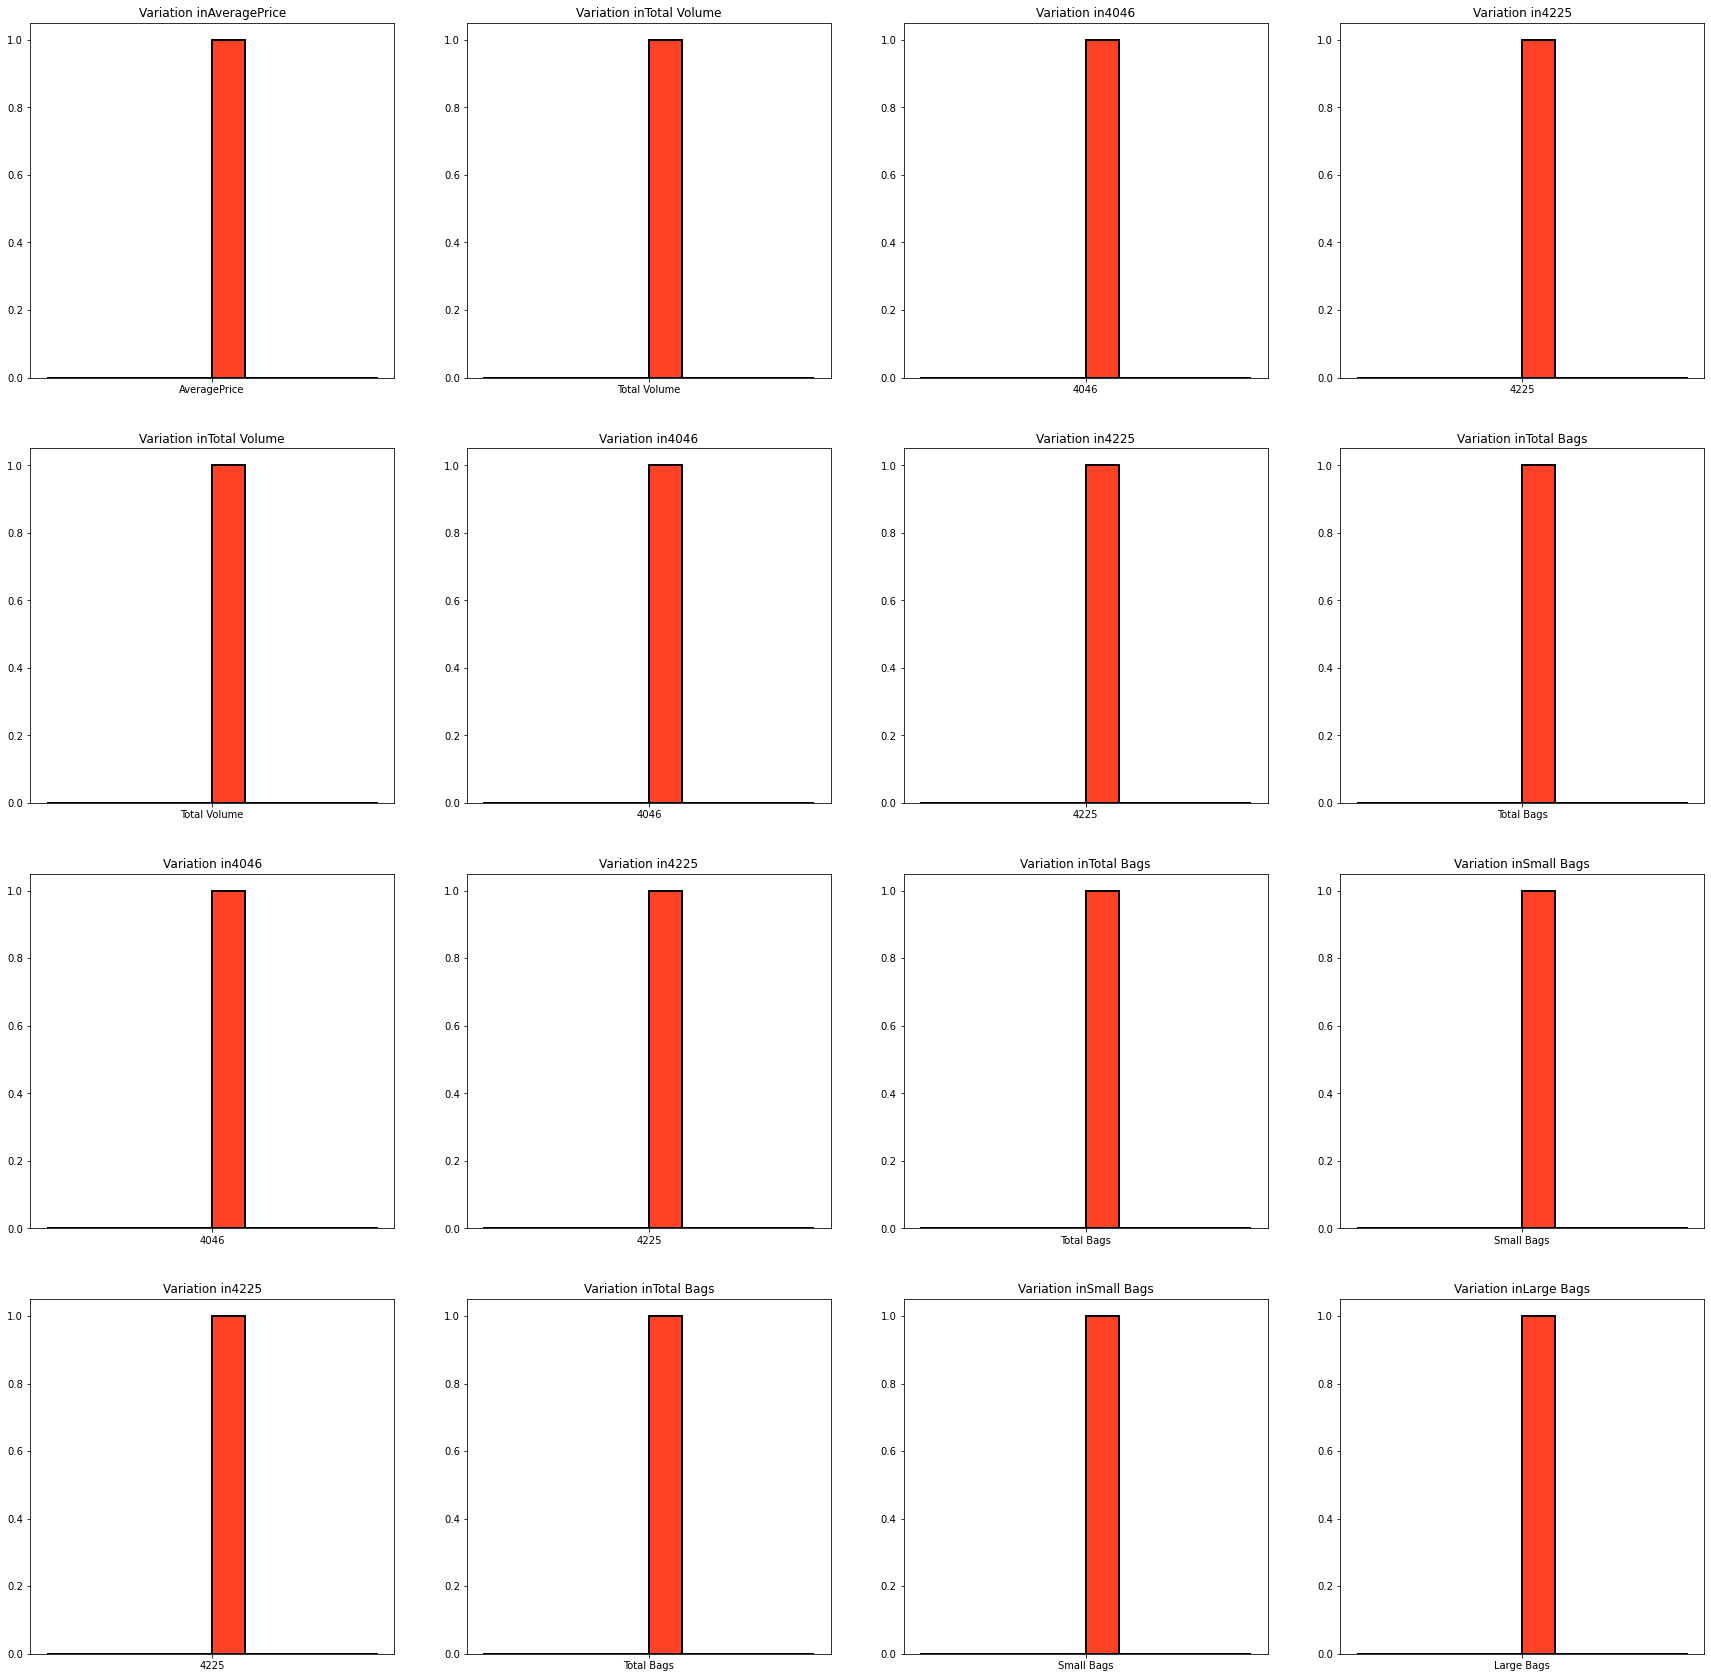

In [39]:
fig,axes=plt.subplots(4,4)
columns=['AveragePrice', 'Total Volume', '4046', '4225', 'Total Bags',
       'Small Bags', 'Large Bags']
for i in range (4):
    for j in range (4):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation in'+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(30,30)
# fig.tight_layout()

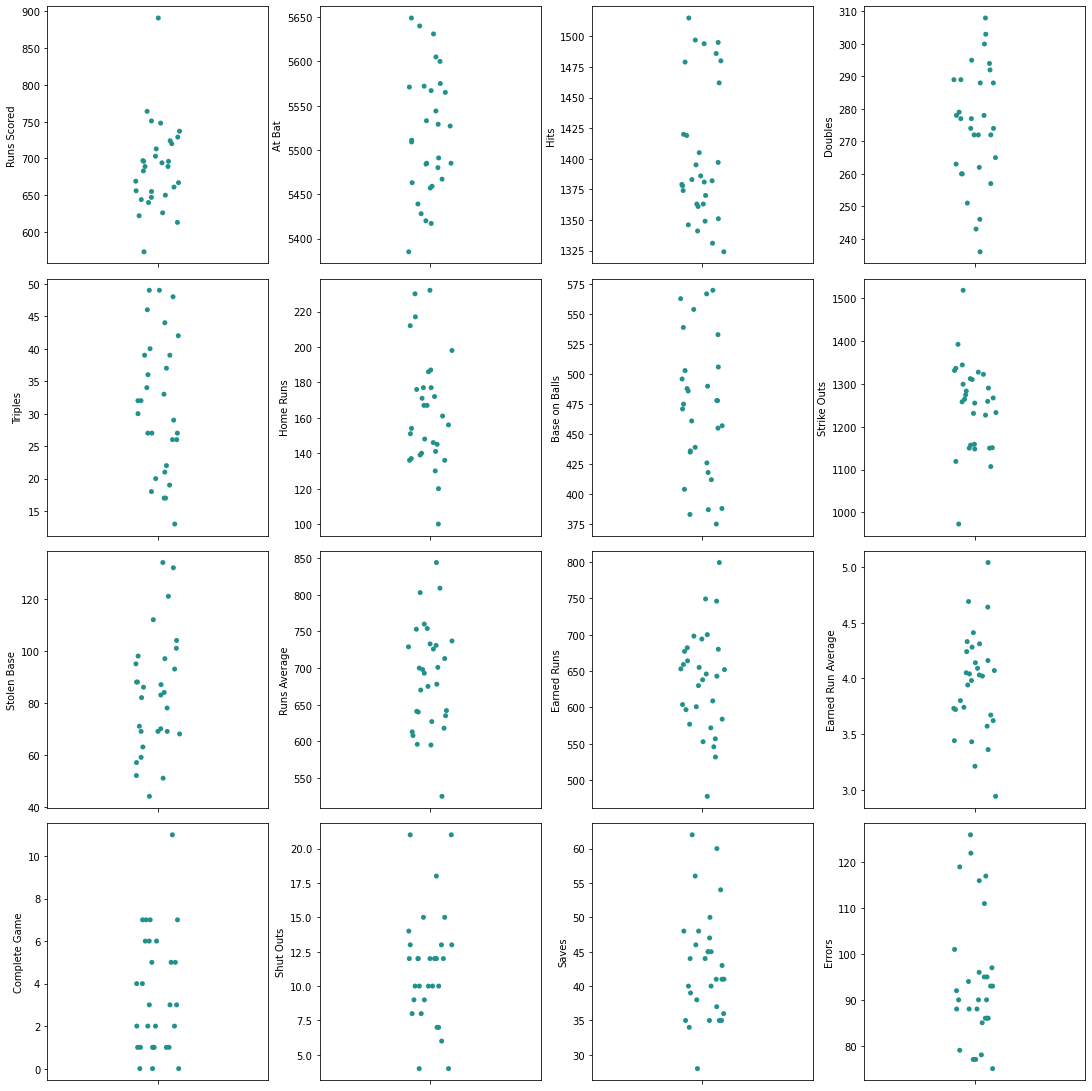

In [42]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index], palette="viridis")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

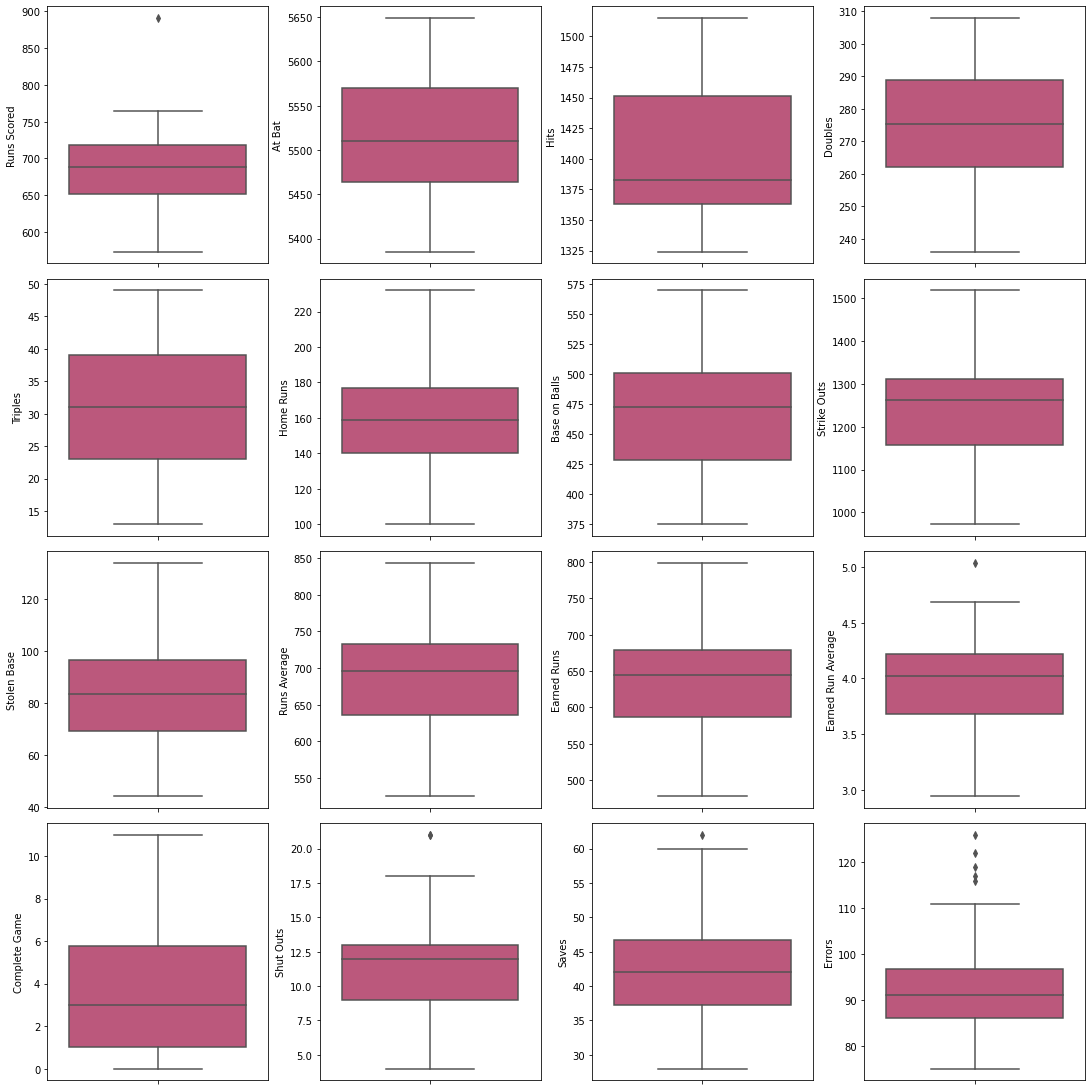

In [44]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()


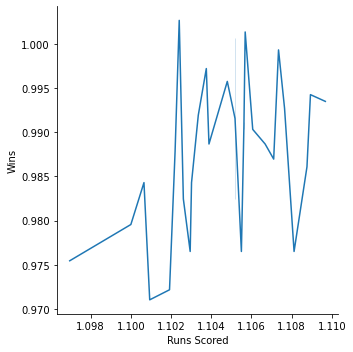

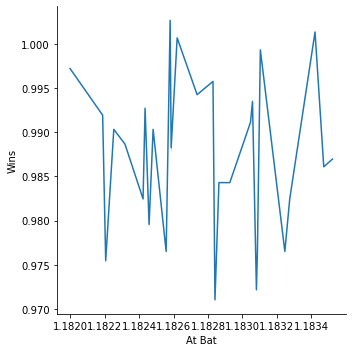

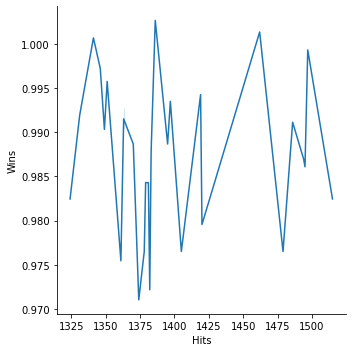

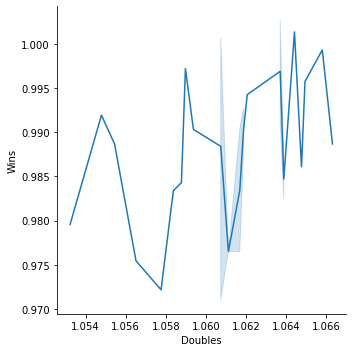

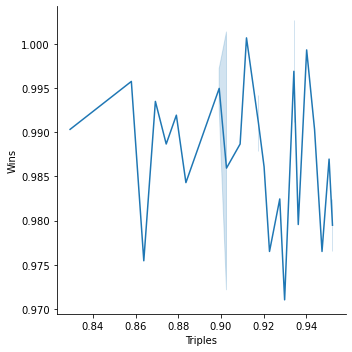

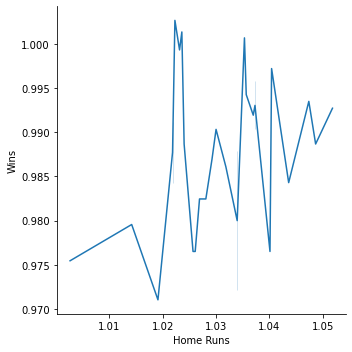

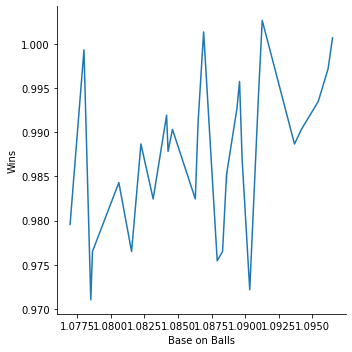

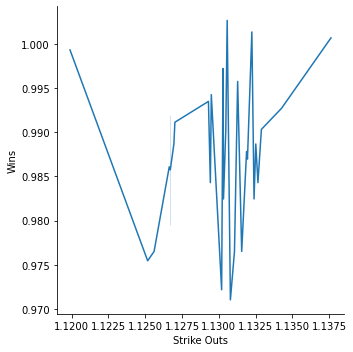

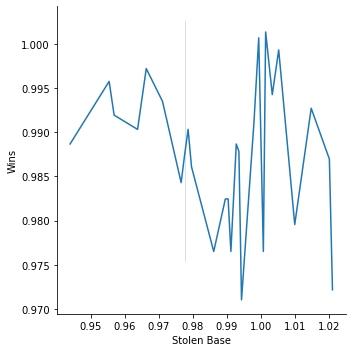

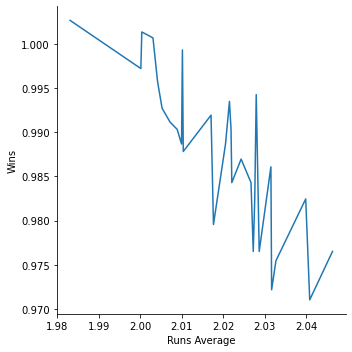

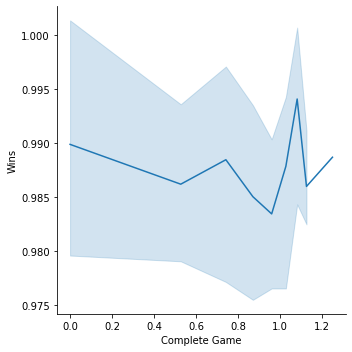

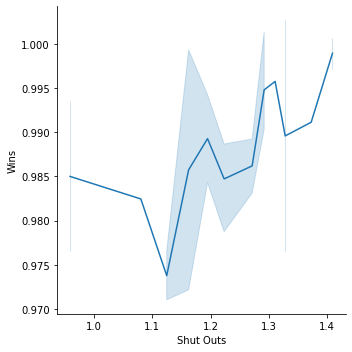

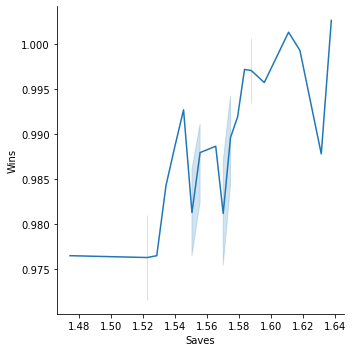

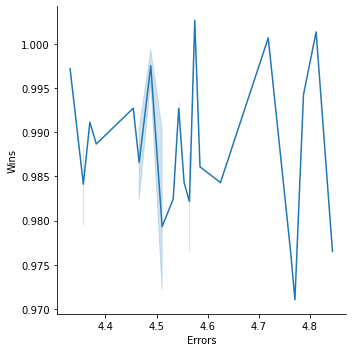

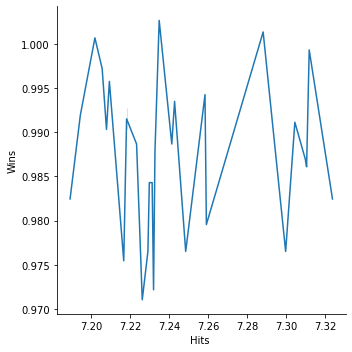

In [164]:
index = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index += 1
plt.show()

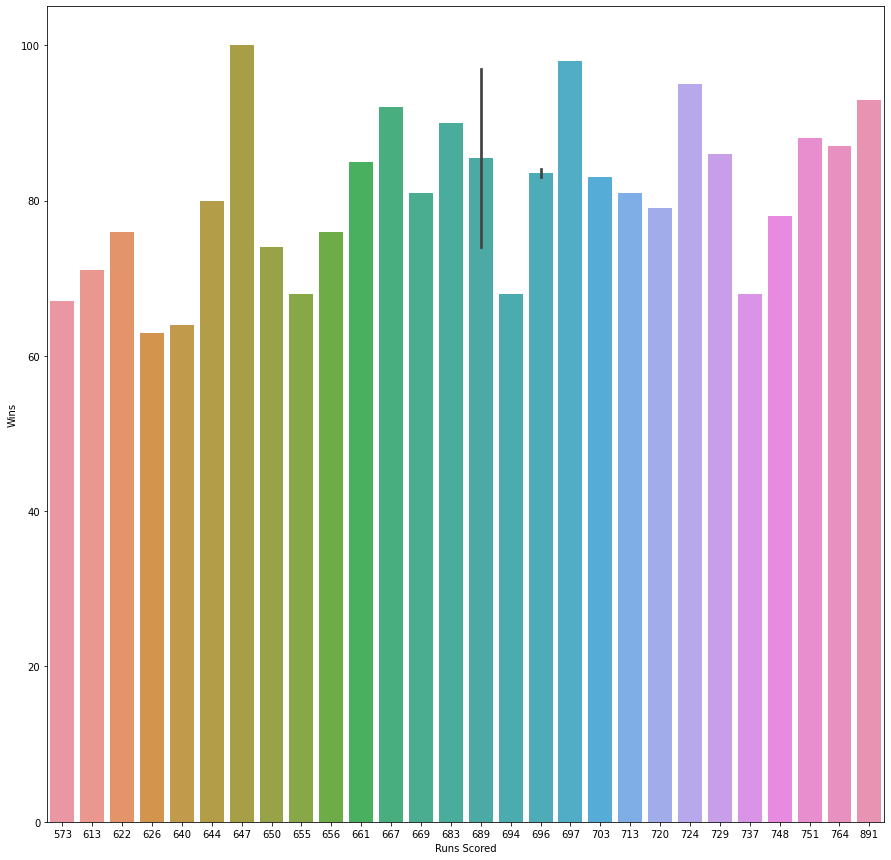

In [46]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Scored", y="Wins", data=df)
plt.show()

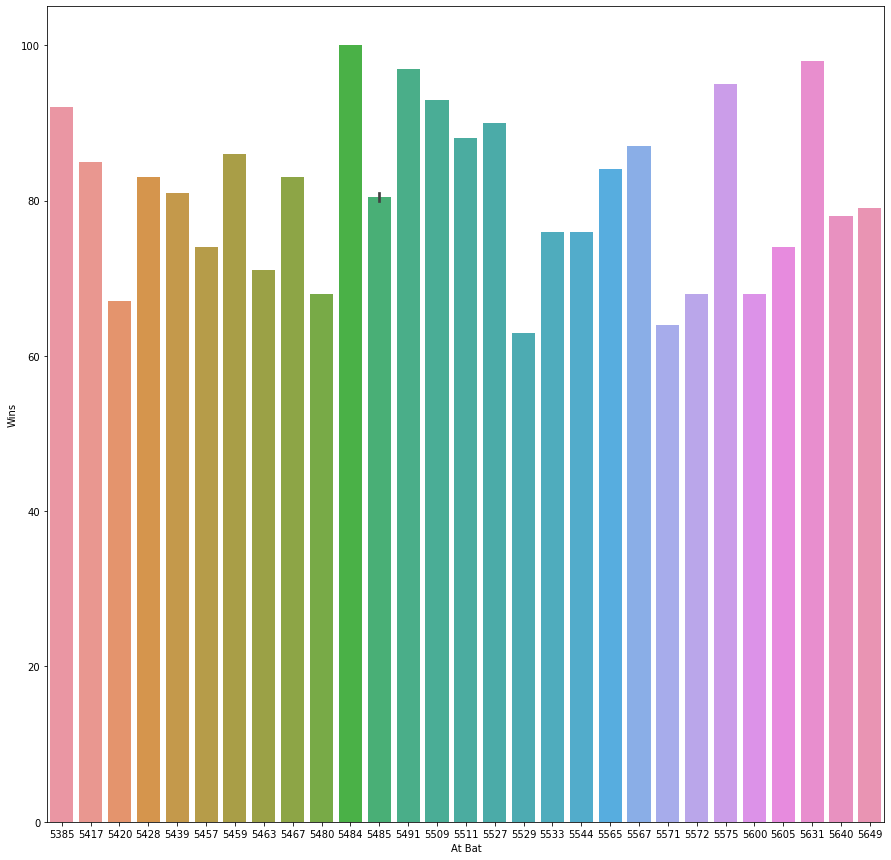

In [47]:
plt.figure(figsize=(15,15))
sns.barplot(x="At Bat", y="Wins", data=df)
plt.show()

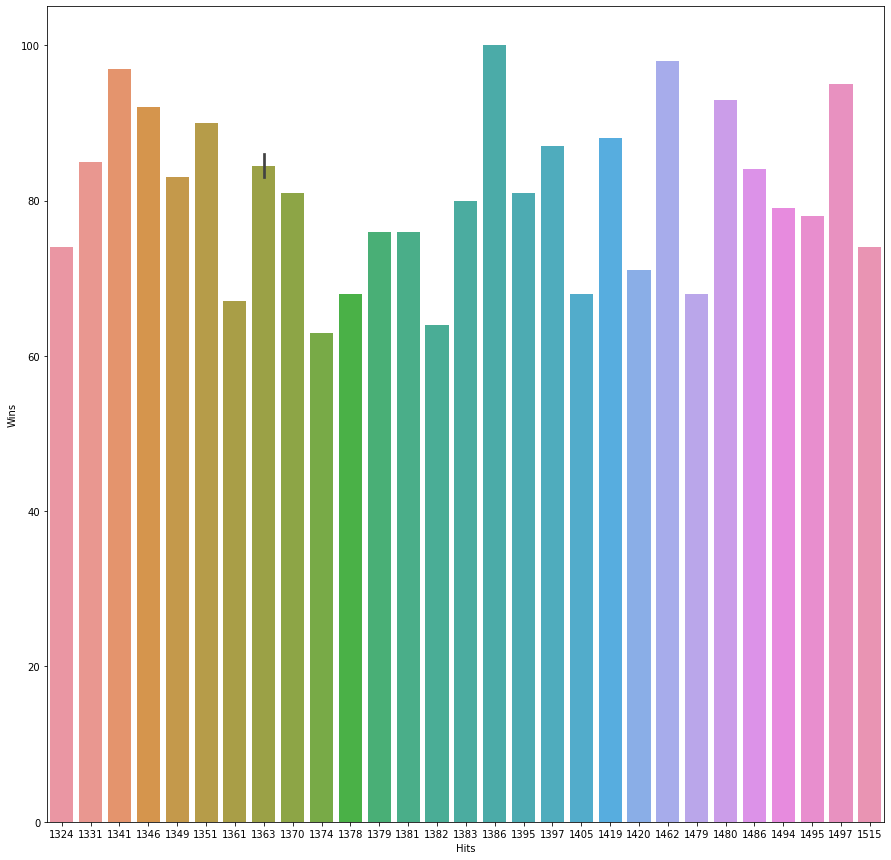

In [48]:
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Wins", data=df)
plt.show()

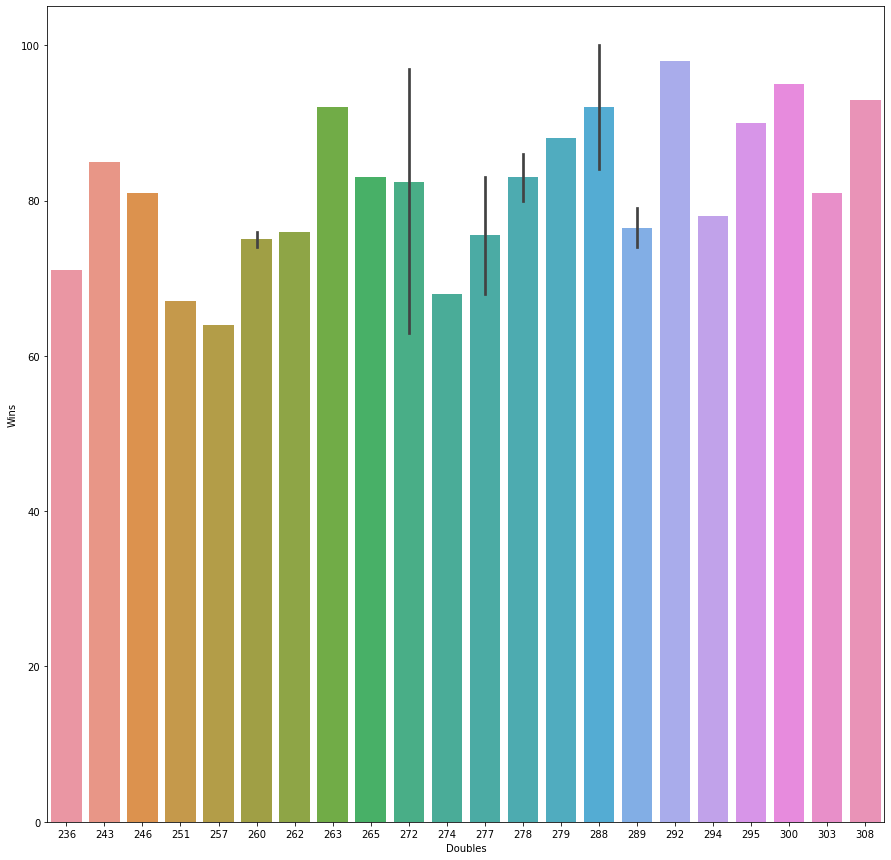

In [49]:
plt.figure(figsize=(15,15))
sns.barplot(x="Doubles", y="Wins", data=df)
plt.show()

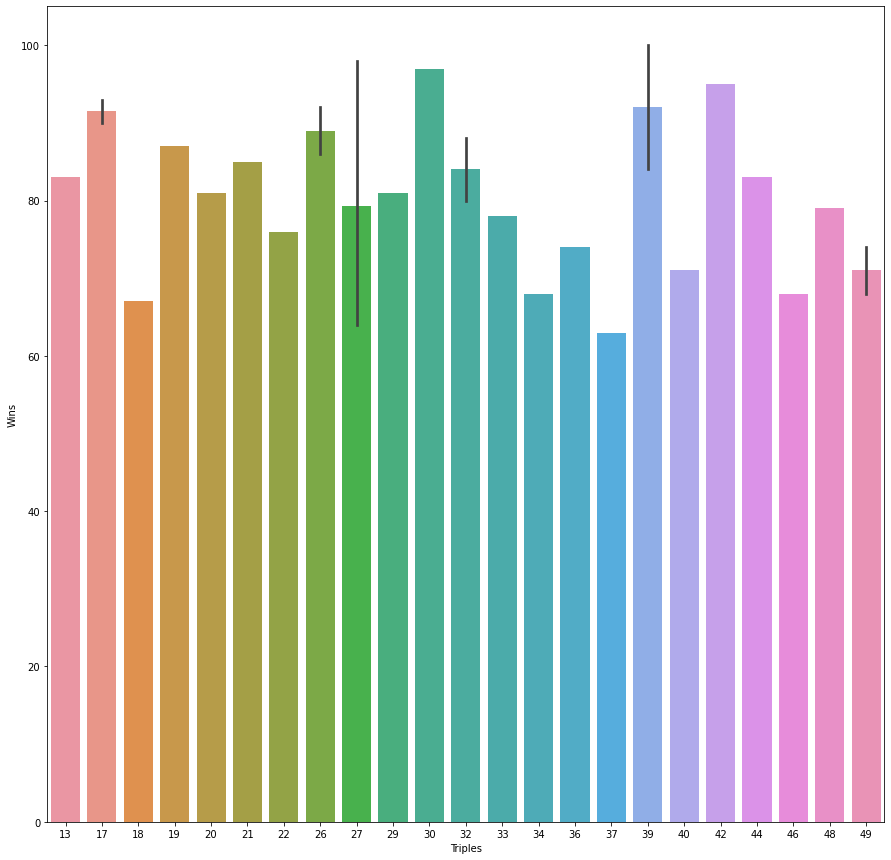

In [50]:
plt.figure(figsize=(15,15))
sns.barplot(x="Triples", y="Wins", data=df)
plt.show()

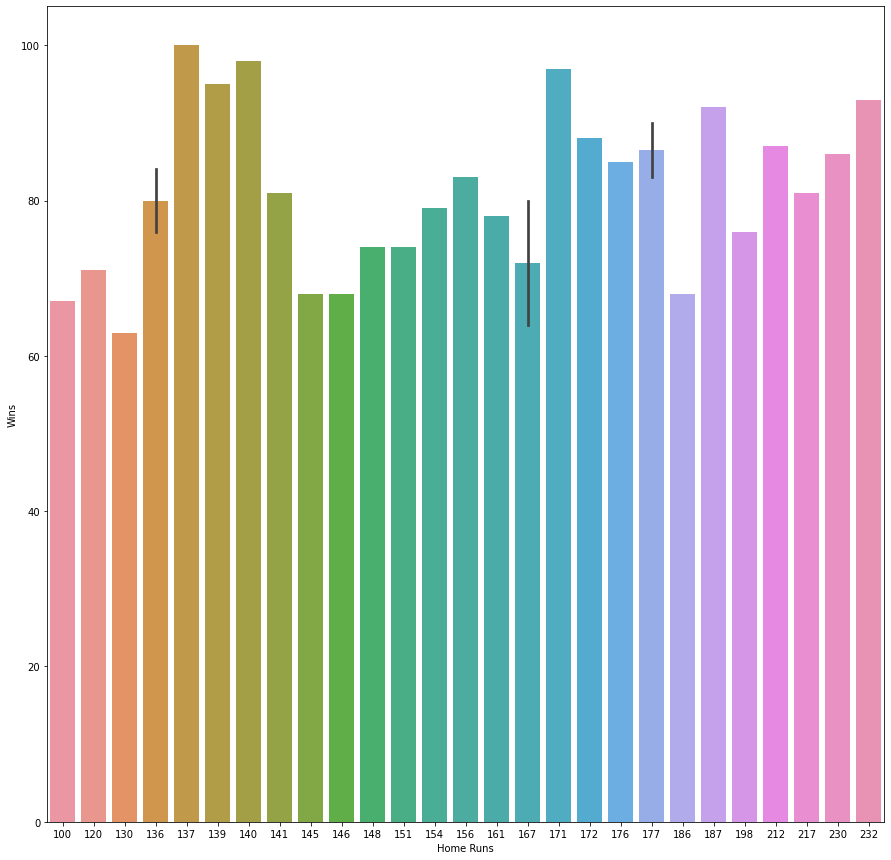

In [51]:
plt.figure(figsize=(15,15))
sns.barplot(x="Home Runs", y="Wins", data=df)
plt.show()

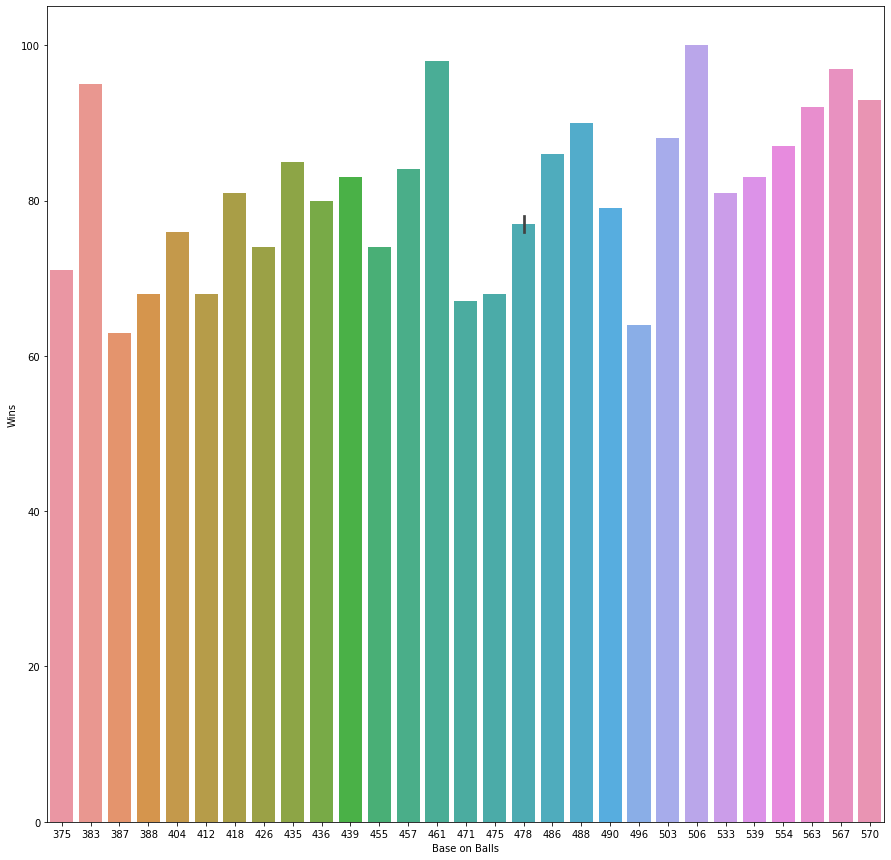

In [52]:
plt.figure(figsize=(15,15))
sns.barplot(x="Base on Balls", y="Wins", data=df)
plt.show()

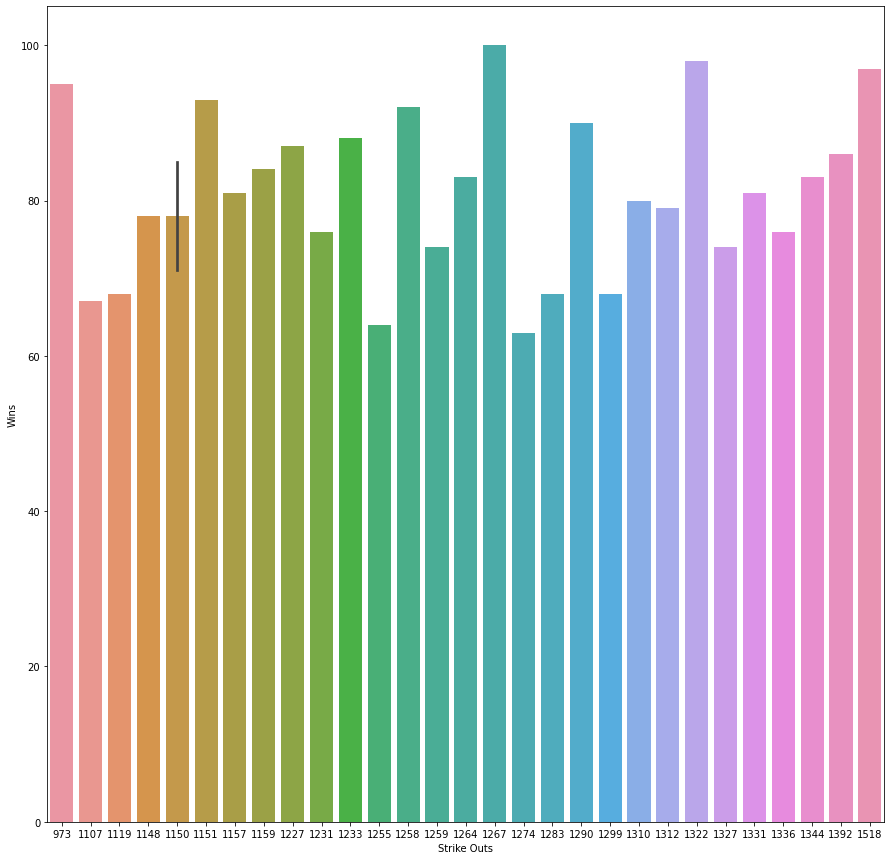

In [53]:
plt.figure(figsize=(15,15))
sns.barplot(x="Strike Outs", y="Wins", data=df)
plt.show()

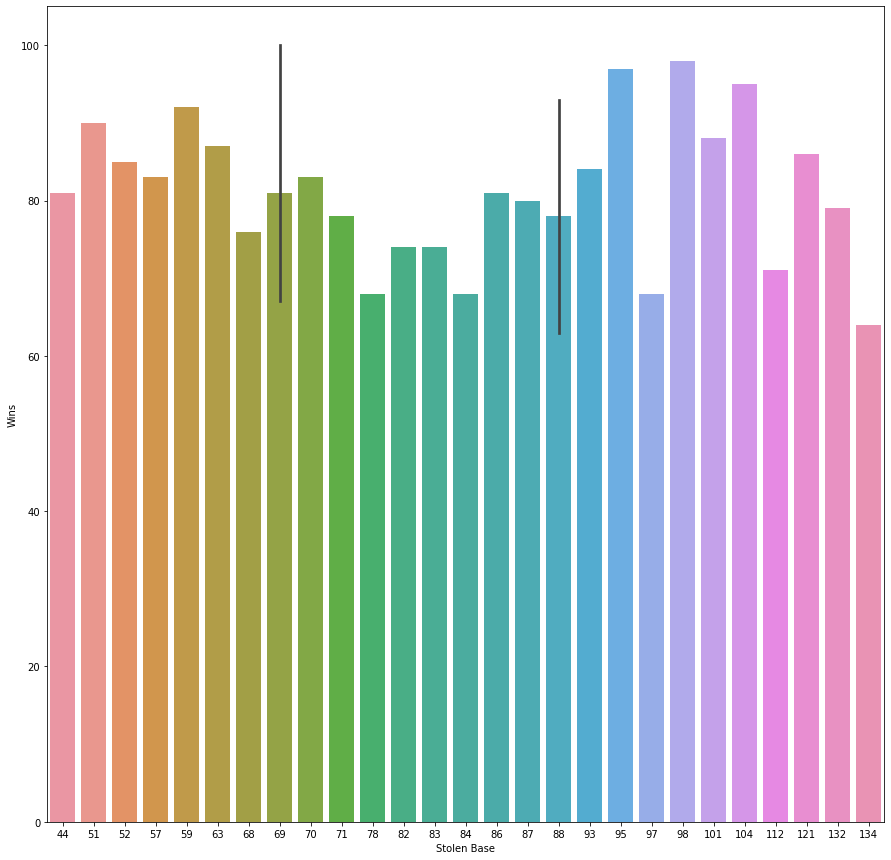

In [54]:
plt.figure(figsize=(15,15))
sns.barplot(x="Stolen Base", y="Wins", data=df)
plt.show()

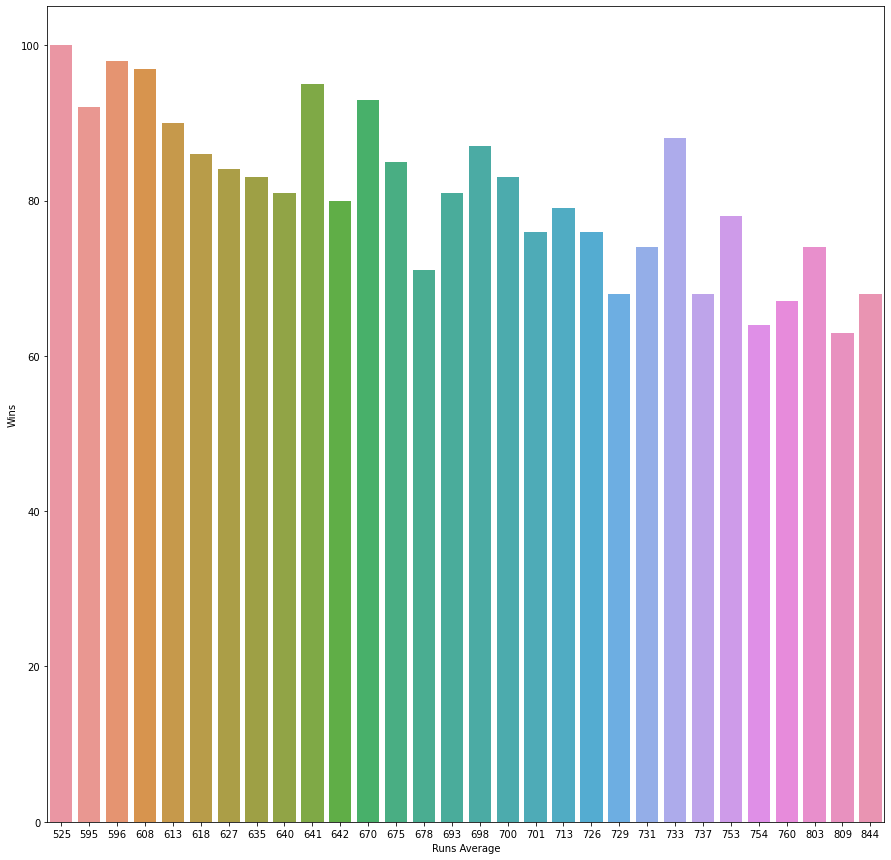

In [55]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Average", y="Wins", data=df)
plt.show()

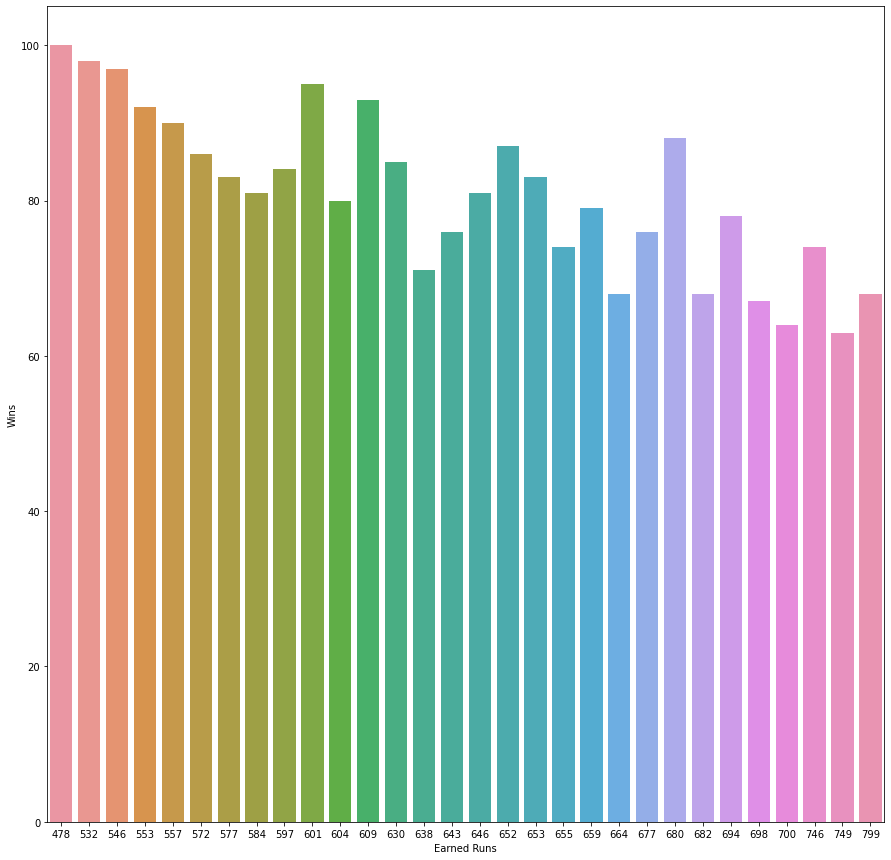

In [56]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Runs", y="Wins", data=df)
plt.show()

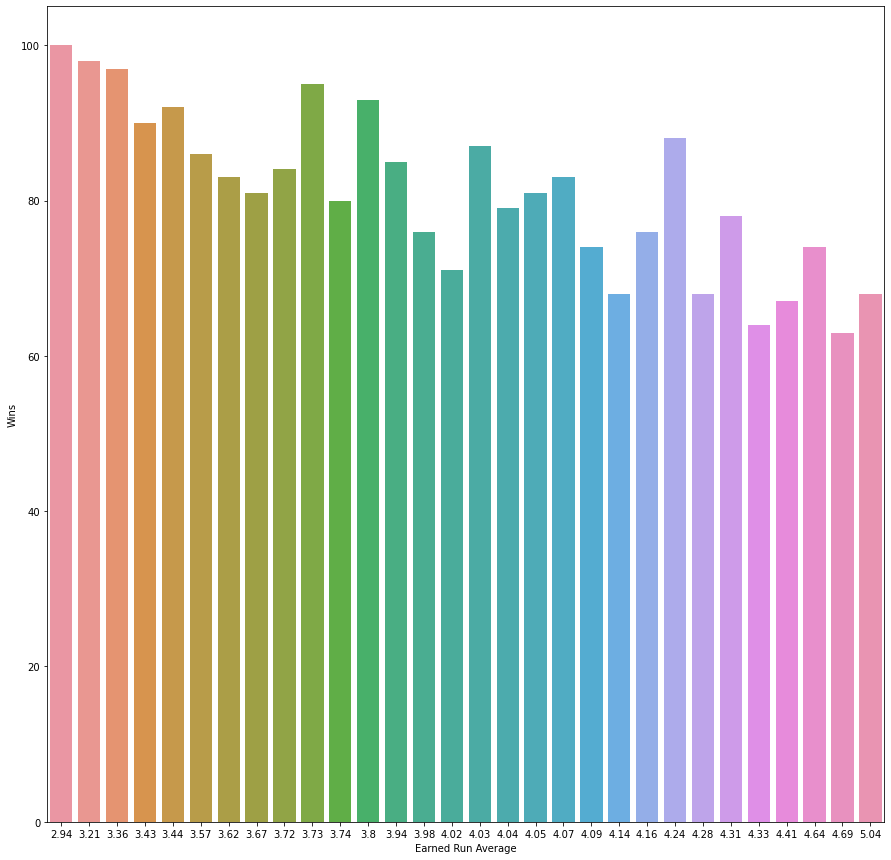

In [57]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Run Average", y="Wins", data=df)
plt.show()

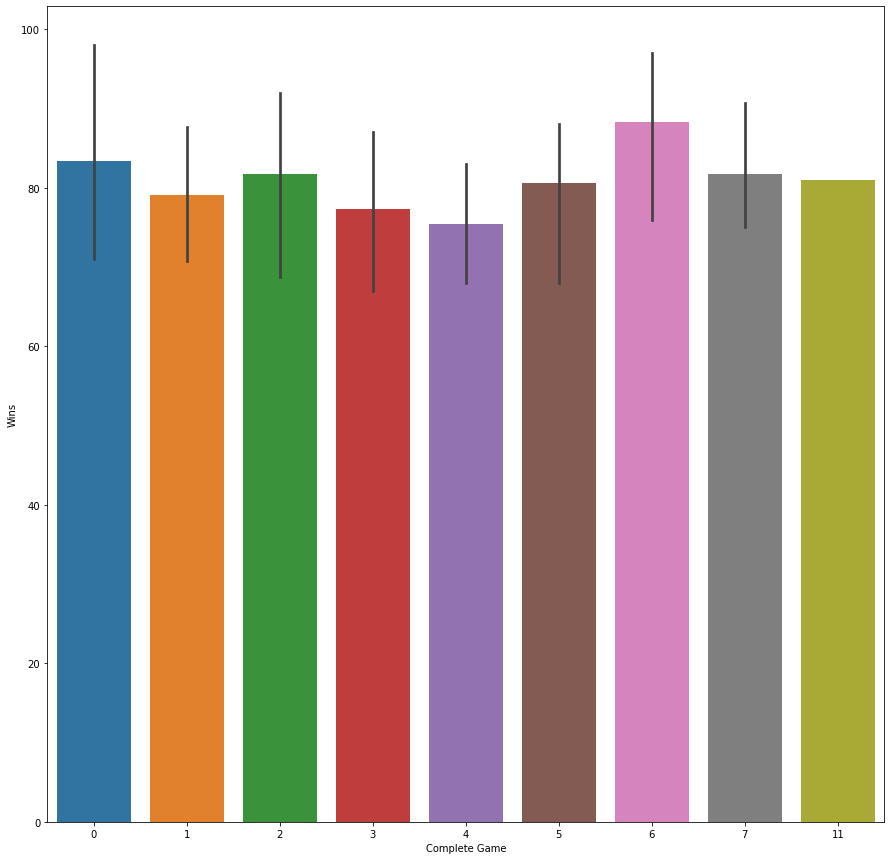

In [58]:
plt.figure(figsize=(15,15))
sns.barplot(x="Complete Game", y="Wins", data=df)
plt.show()

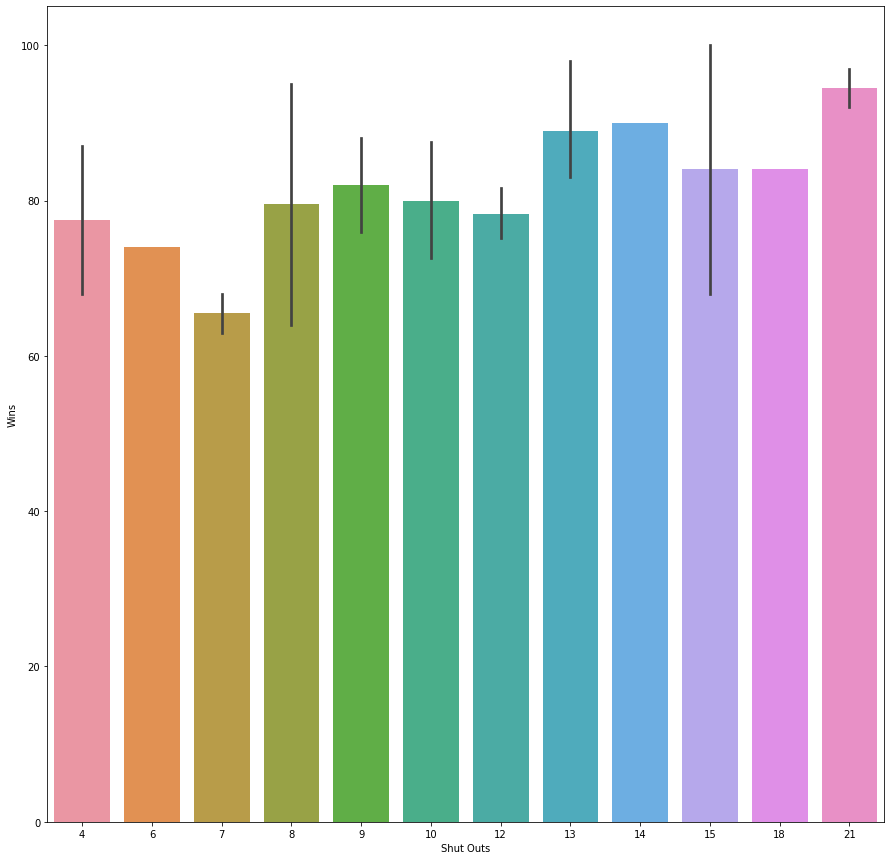

In [59]:
plt.figure(figsize=(15,15))
sns.barplot(x="Shut Outs", y="Wins", data=df)
plt.show()

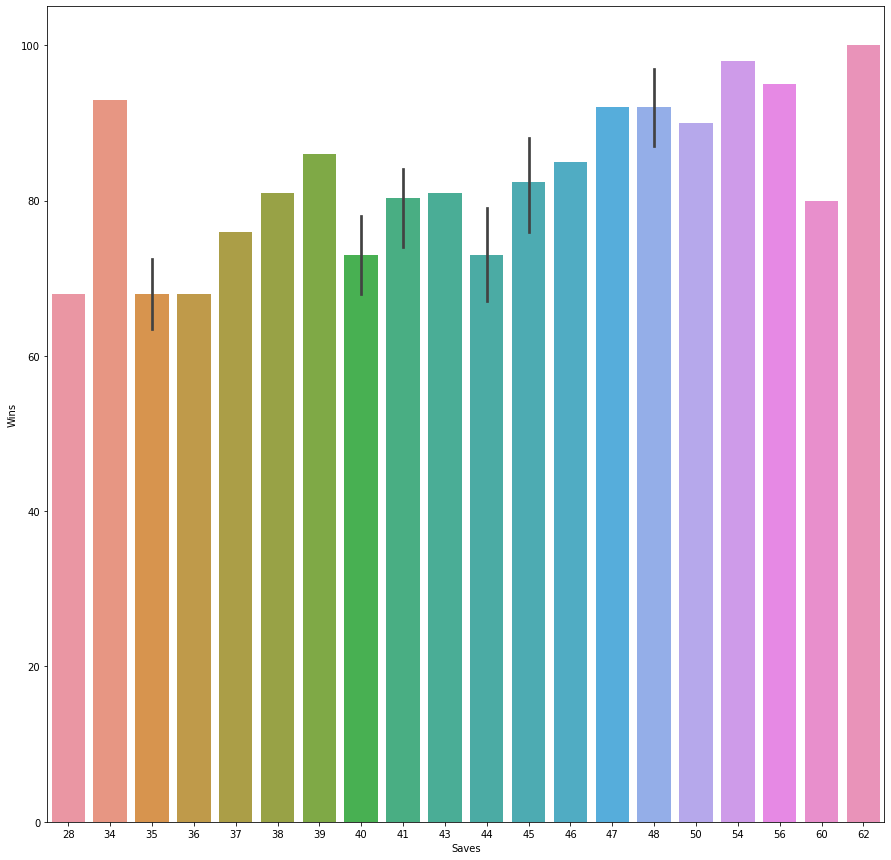

In [60]:
plt.figure(figsize=(15,15))
sns.barplot(x="Saves", y="Wins", data=df)
plt.show()

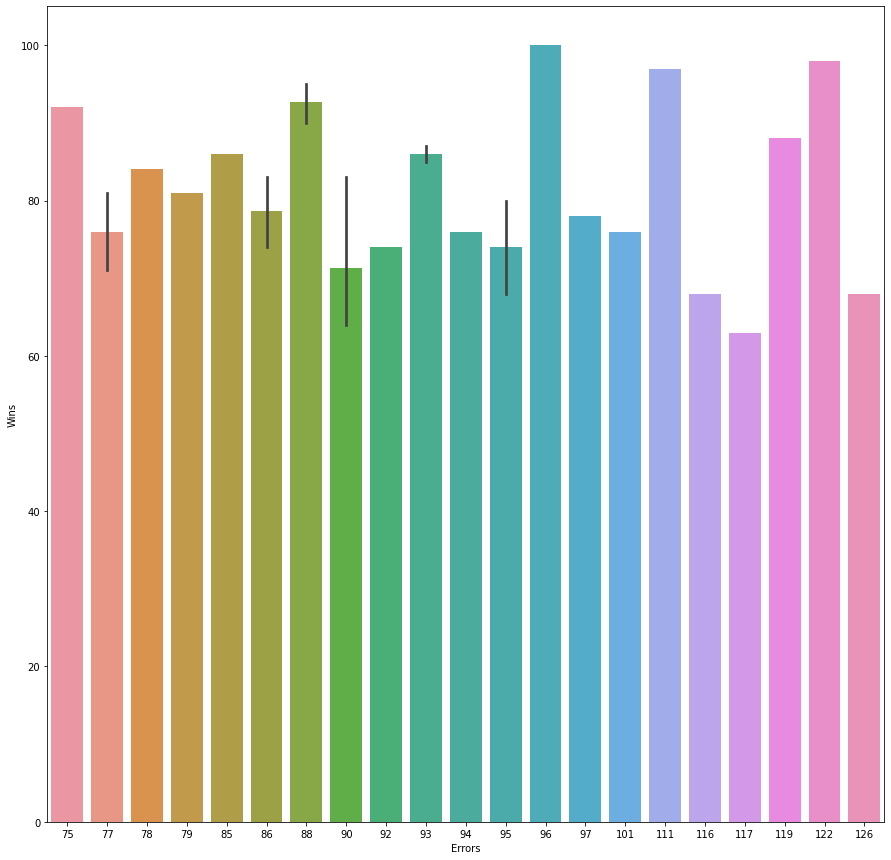

In [61]:
plt.figure(figsize=(15,15))
sns.barplot(x="Errors", y="Wins", data=df)
plt.show()

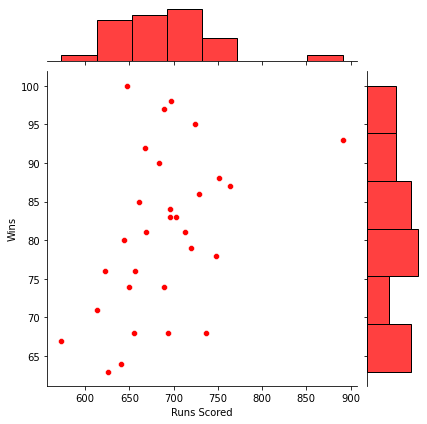

In [62]:
sns.jointplot(x="Runs Scored", y="Wins", data=df, color="red")

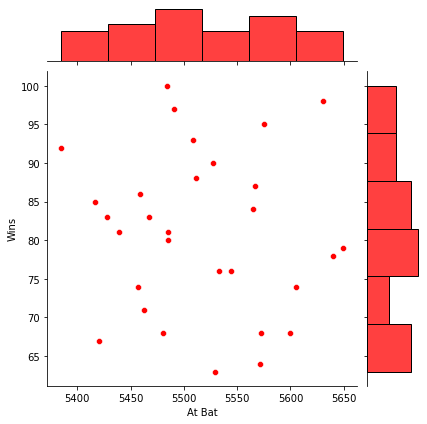

In [63]:
sns.jointplot(x="At Bat", y="Wins", data=df, color="red")

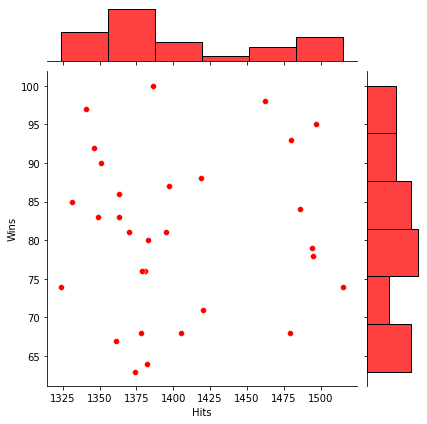

In [64]:
sns.jointplot(x="Hits", y="Wins", data=df, color="red")

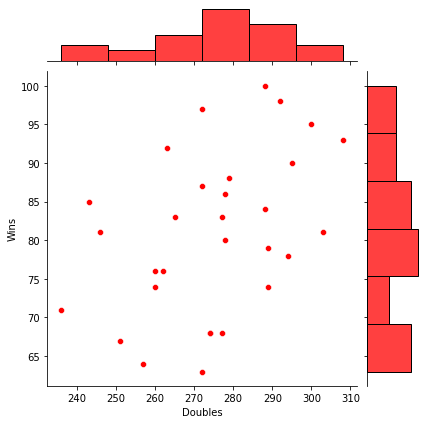

In [65]:
sns.jointplot(x="Doubles", y="Wins", data=df, color="red")

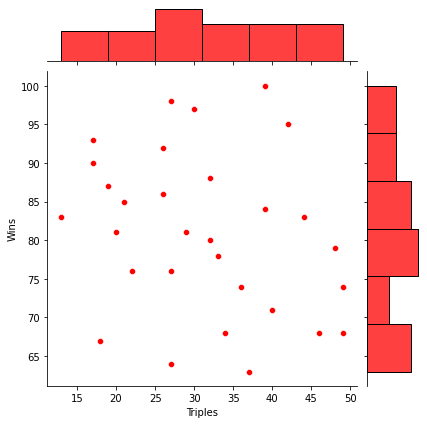

In [66]:
sns.jointplot(x="Triples", y="Wins", data=df, color="red")

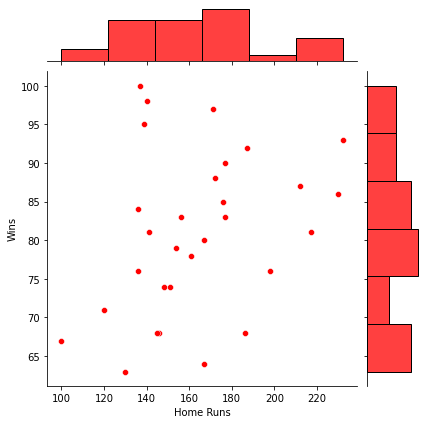

In [67]:
sns.jointplot(x="Home Runs", y="Wins", data=df, color="red")

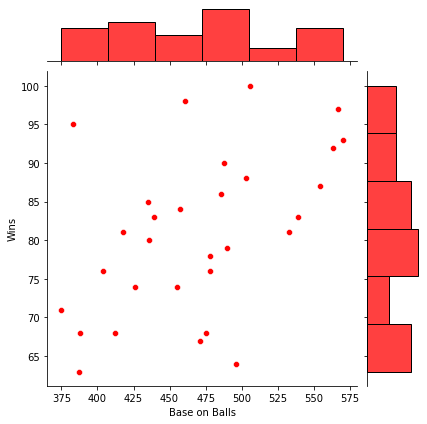

In [68]:
sns.jointplot(x="Base on Balls", y="Wins", data=df, color="red")

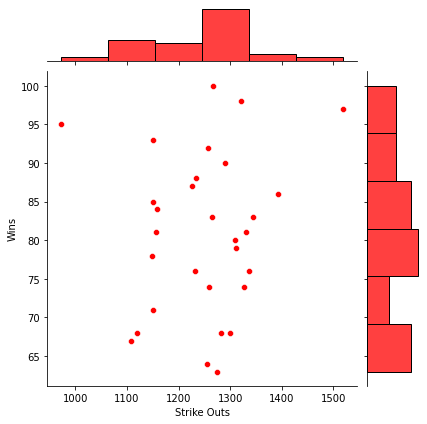

In [69]:
sns.jointplot(x="Strike Outs", y="Wins", data=df, color="red")

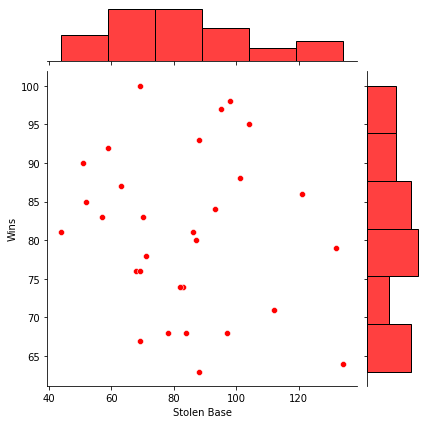

In [70]:
sns.jointplot(x="Stolen Base", y="Wins", data=df, color="red")

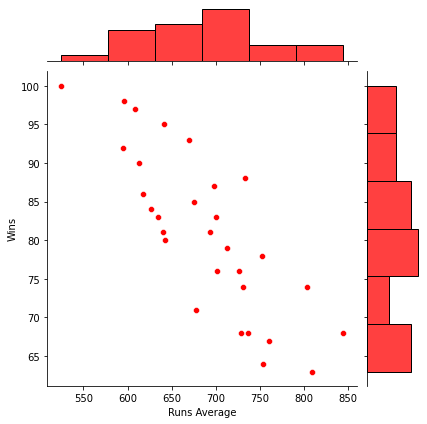

In [71]:
sns.jointplot(x="Runs Average", y="Wins", data=df, color="red")


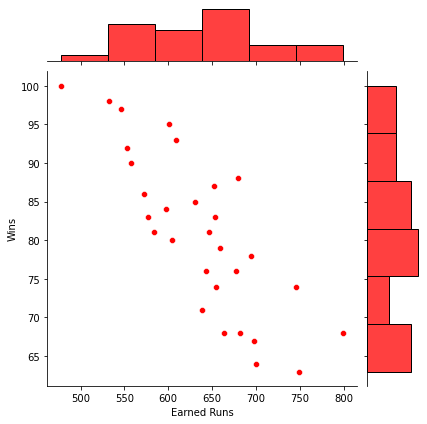

In [72]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="red")

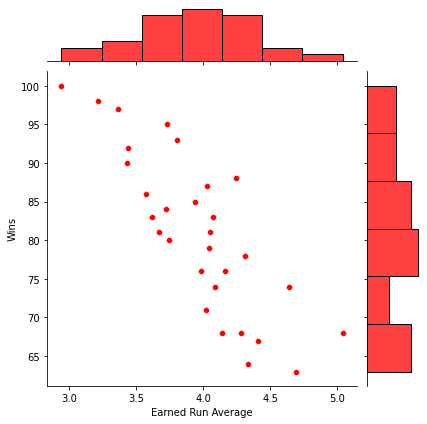

In [73]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="red")

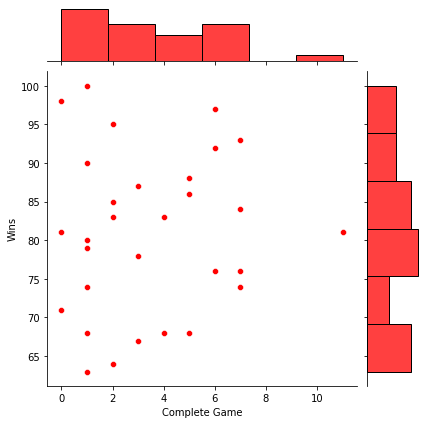

In [74]:
sns.jointplot(x="Complete Game", y="Wins", data=df, color="red")

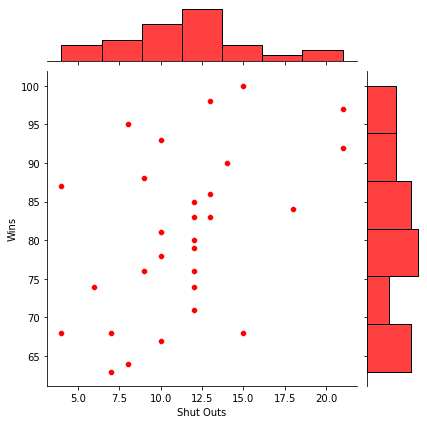

In [75]:
sns.jointplot(x="Shut Outs", y="Wins", data=df, color="red")

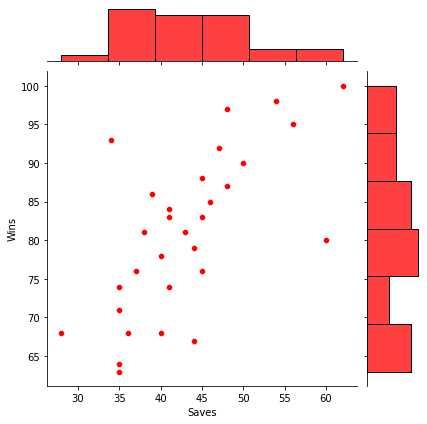

In [76]:
sns.jointplot(x="Saves", y="Wins", data=df, color="red")

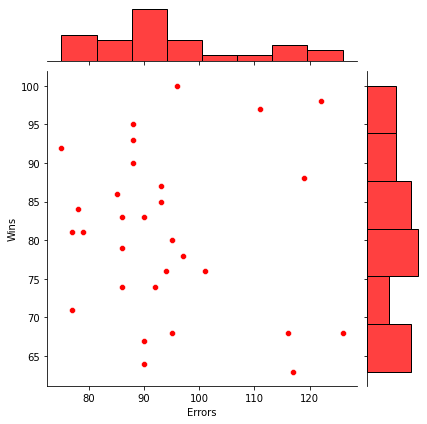

In [77]:
sns.jointplot(x="Errors", y="Wins", data=df, color="red")

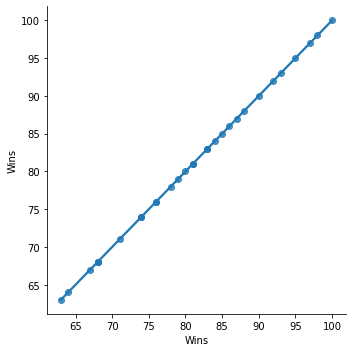

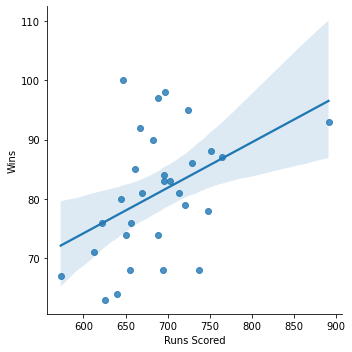

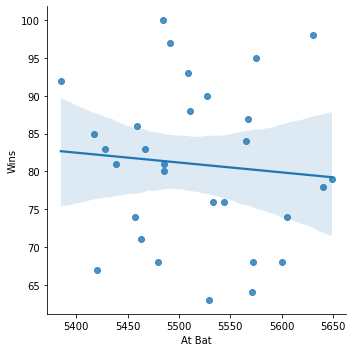

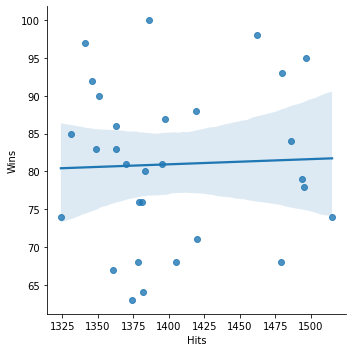

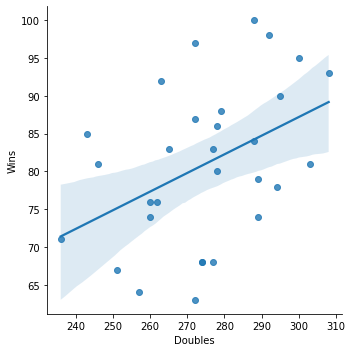

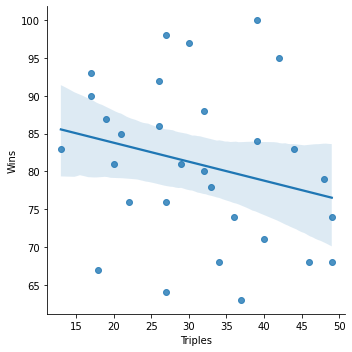

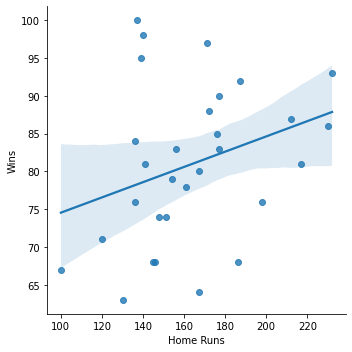

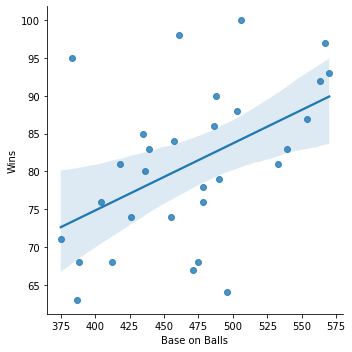

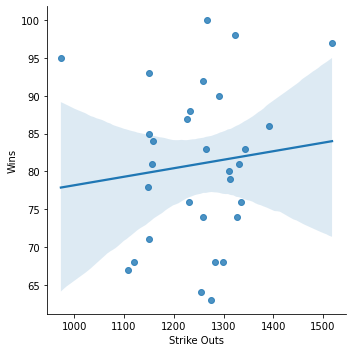

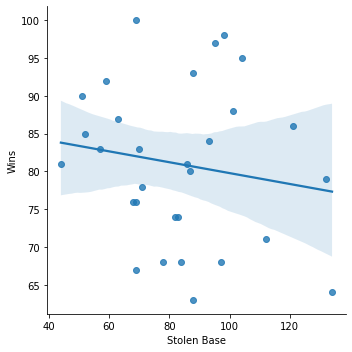

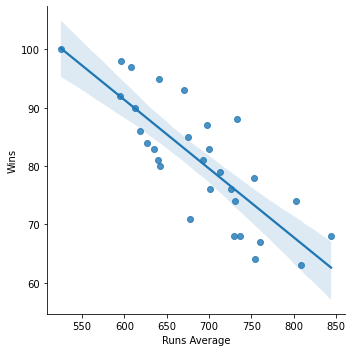

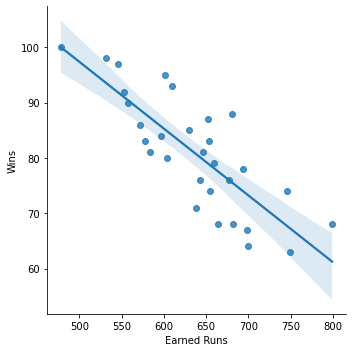

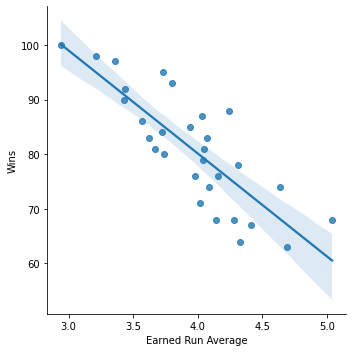

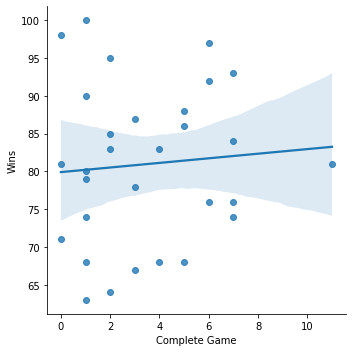

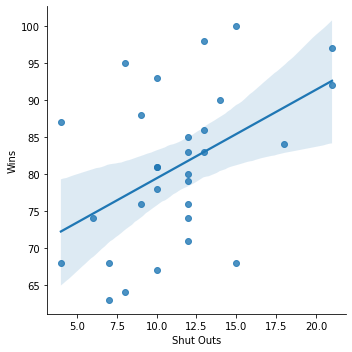

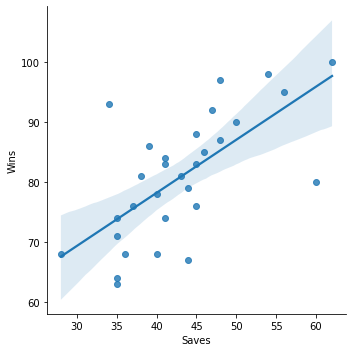

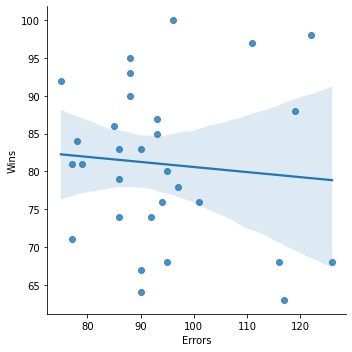

In [78]:
for i in df:
    sns.lmplot(x = i , y ='Wins' , data = df)

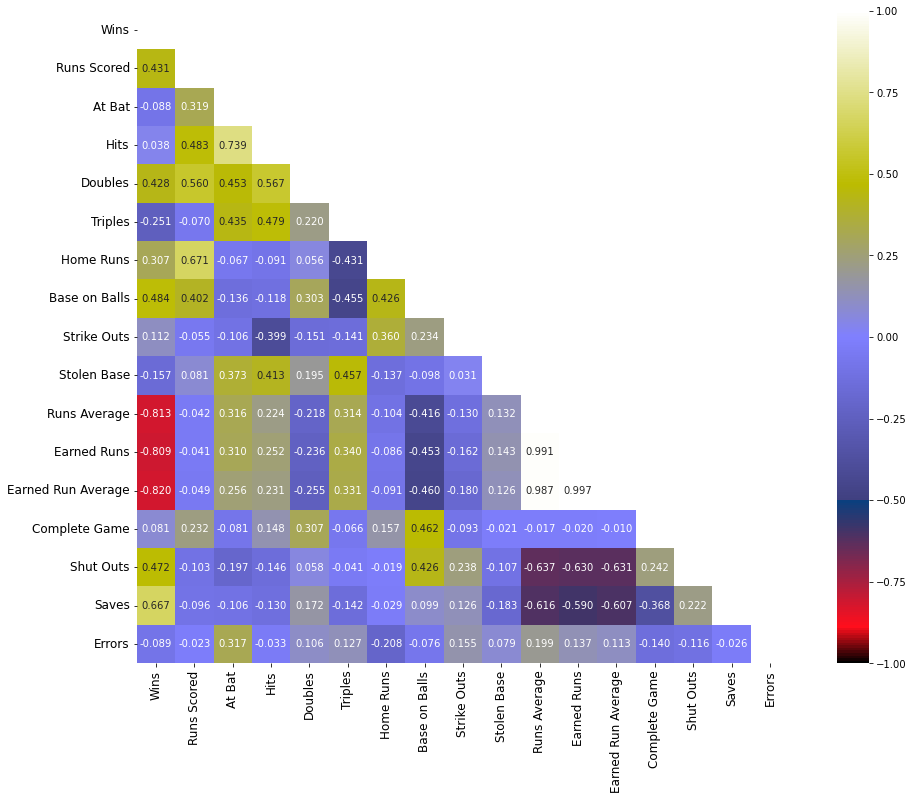

In [79]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [89]:
df = df.drop(["Earned Runs", "Earned Run Average"], axis=1)

KeyError: "['Earned Runs' 'Earned Run Average'] not found in axis"

In [90]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (29, 15)
Shape of the dataframe after removing outliers:  (29, 15)
Percentage of data loss post outlier removal:  0.0


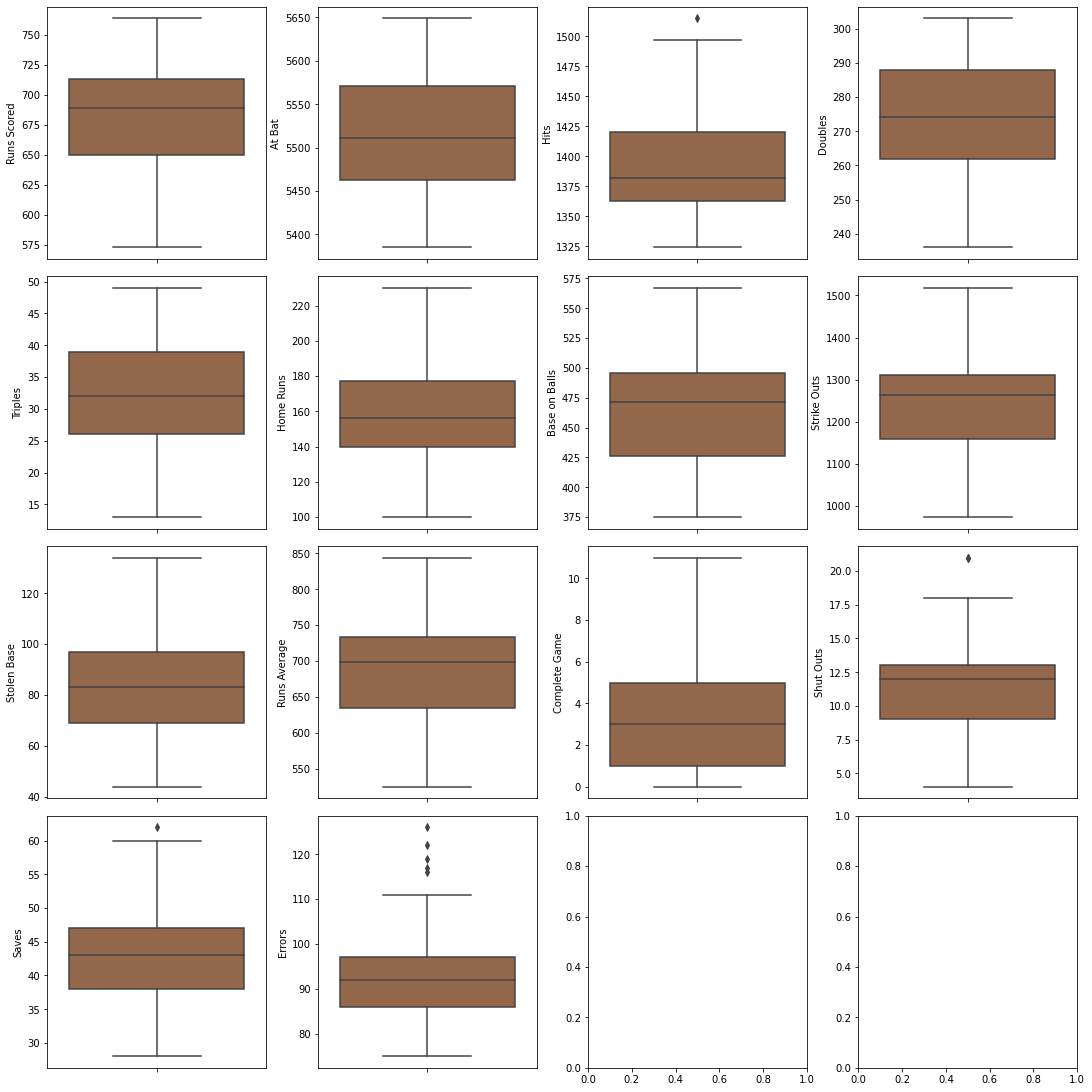

In [82]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="copper")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [91]:
df.skew()

Wins             0.119013
Runs Scored     -0.215364
At Bat           0.169573
Hits             0.783772
Doubles         -0.335304
Triples          0.090124
Home Runs        0.450862
Base on Balls    0.151193
Strike Outs     -0.233815
Stolen Base      0.494966
Runs Average     0.018155
Complete Game    0.854980
Shut Outs        0.526943
Saves            0.627480
Errors           0.840271
dtype: float64

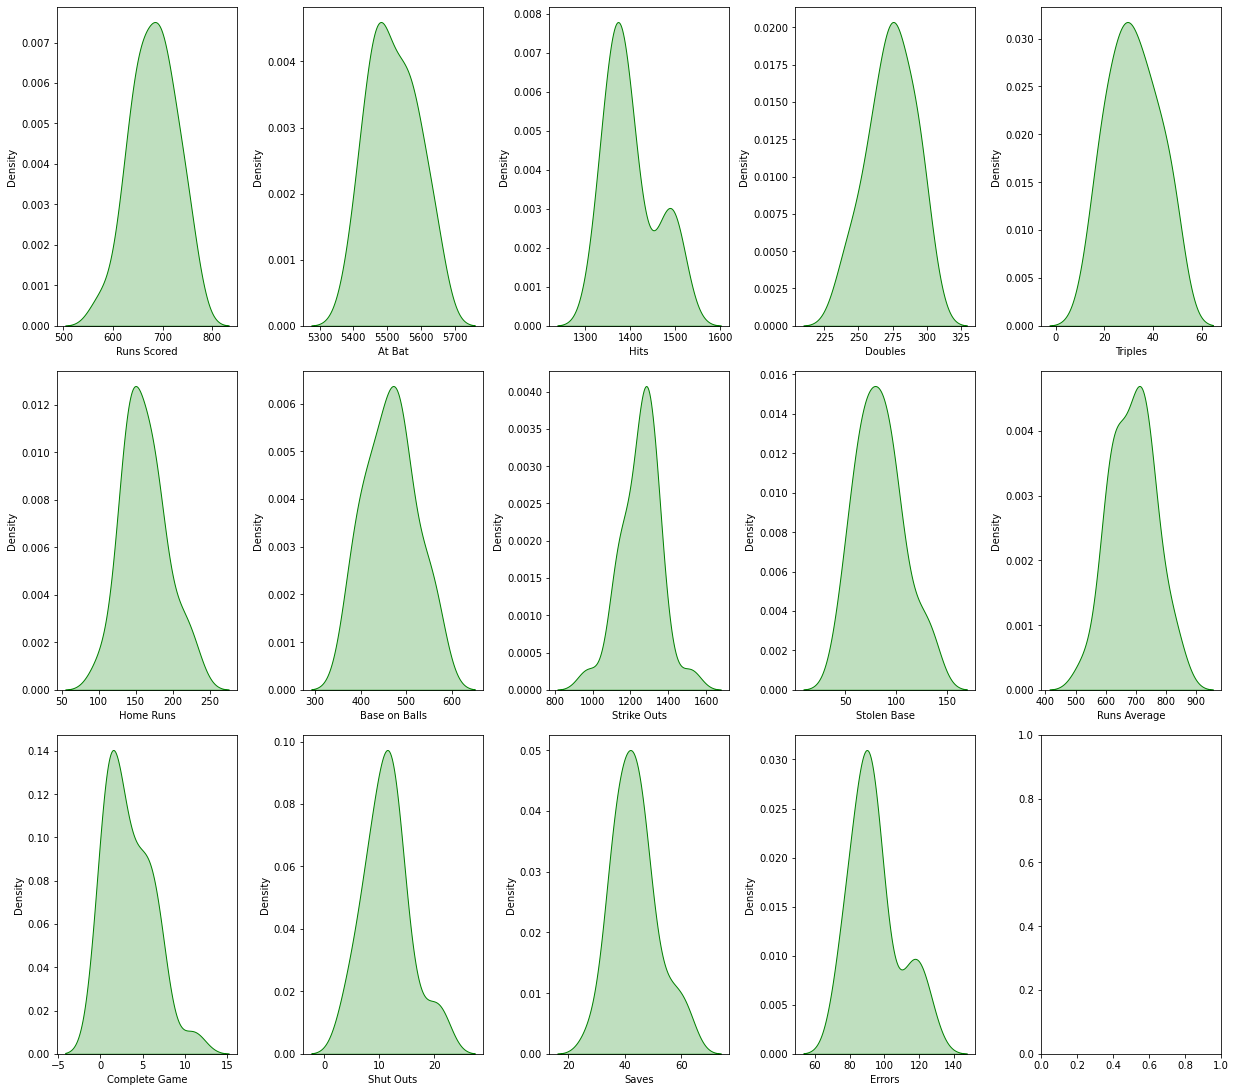

In [84]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [115]:
X = df.drop('Wins', axis=1)
Y = df['Wins']

# Feature Scaling

In [93]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Complete Game,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.617213,-0.570122,0.211006,1.757915


# Variance Inflation Factor(VIF)

In [116]:
vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,Features List,VIF Value
0,Runs Scored,8.087544e+05
1,At Bat,3.000942e+07
2,Hits,6.142652e+05
3,Doubles,3.248252e+05
4,Triples,2.285548e+03
5,Home Runs,5.196485e+04
6,Base on Balls,1.158562e+05
7,Strike Outs,2.635631e+05
8,Stolen Base,5.531992e+03
9,Runs Average,9.173168e+04


In [118]:
X.skew()

Runs Scored     -0.420299
At Bat           0.145248
Hits             0.783772
Doubles         -0.495413
Triples         -0.718380
Home Runs       -0.233187
Base on Balls   -0.100564
Strike Outs     -0.694375
Stolen Base     -0.287958
Runs Average    -0.299216
Complete Game   -0.908381
Shut Outs       -0.940625
Saves           -0.006948
Errors           0.586101
Hits             0.738455
dtype: float64

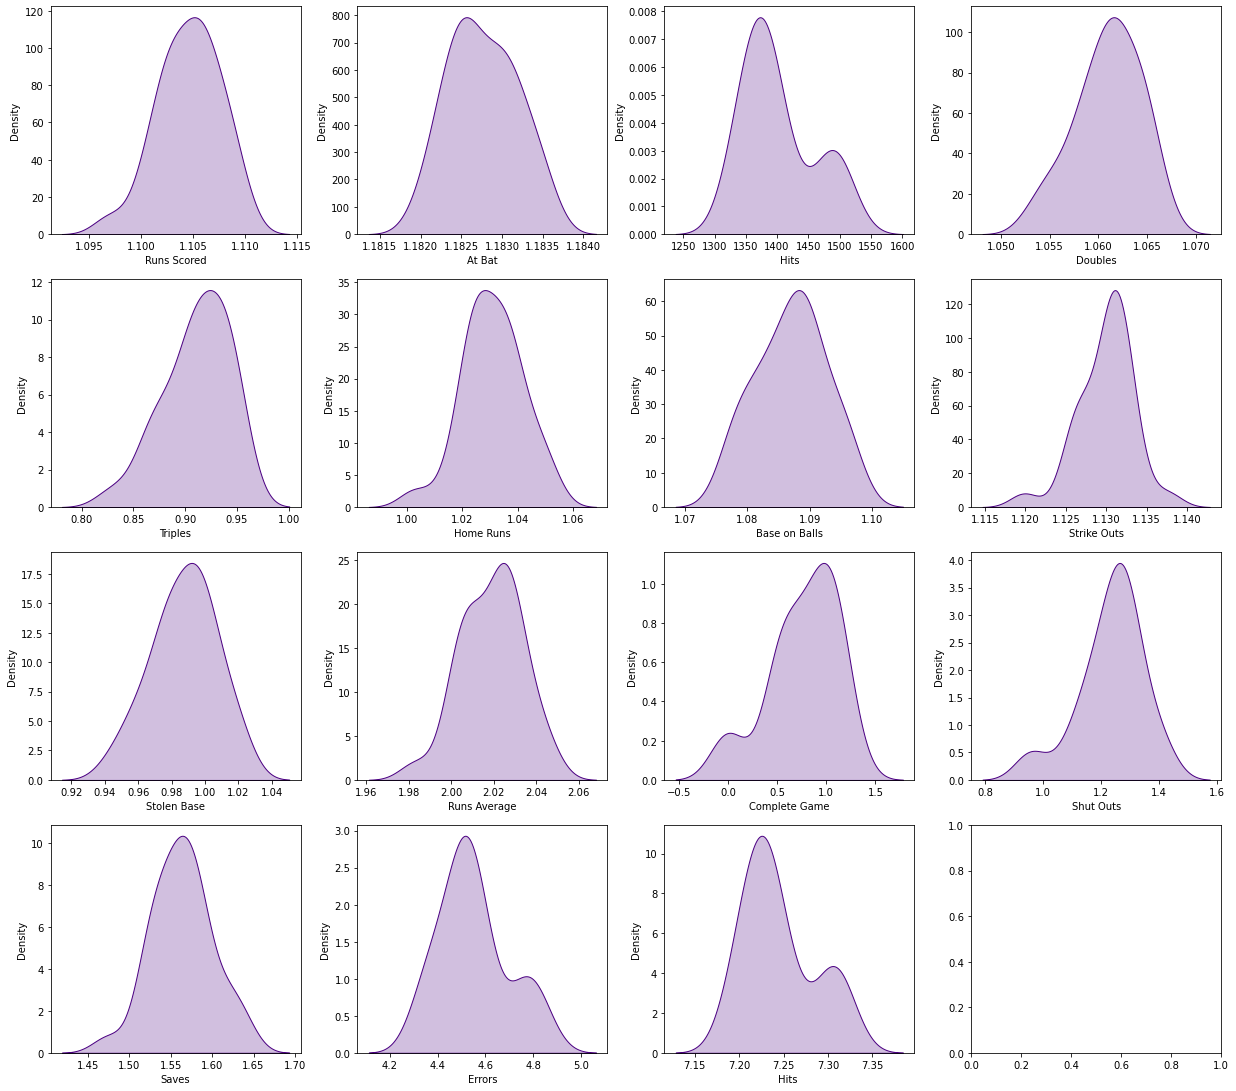

In [119]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
ax = ax.flatten()
for col, value in X.items():
    sns.distplot(value, ax=ax[index], hist=False, color="indigo", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# Finding best random state for building Regression Models

In [122]:

maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9606620710615428 on Random State 838


In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)

# Machine Learning Model for Regression with Evaluation Metrics

In [124]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

# Linear Regression Model

In [146]:
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.006741788729344762
R2 Score is: 57.86627889944667
Cross Validation Score: 34.71452841587409
R2 Score - Cross Validation Score is 23.151750483572577


# Ridge Regression

In [147]:
model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.004488142832084847
R2 Score is: 81.32705242360923
Cross Validation Score: 36.05552696140075
R2 Score - Cross Validation Score is 45.27152546220848


# Lasso Regression

In [148]:
model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.010391558264432079
R2 Score is: -0.10157085692688028
Cross Validation Score: -50.63058871997528
R2 Score - Cross Validation Score is 50.529017863048395


# Support Vector Regression

In [149]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.010452395773692356
R2 Score is: -1.2770936948620193
Cross Validation Score: -55.08347216012219
R2 Score - Cross Validation Score is 53.806378465260174


# Decision Tree Regressor

In [150]:
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.009711122104891154
R2 Score is: 12.578476949587058
Cross Validation Score: -76.21359025382091
R2 Score - Cross Validation Score is 88.79206720340797


# Random Forest Regressor

In [151]:
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.008418135630592048
R2 Score is: 34.30816760655995
Cross Validation Score: -8.44994234373612
R2 Score - Cross Validation Score is 42.75810995029607


# K Neighbors Regressor

In [152]:
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.008474457855694839
R2 Score is: 33.42619382751349
Cross Validation Score: -19.595034750630276
R2 Score - Cross Validation Score is 53.02122857814376


# K Neighbors Regressor

In [153]:
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.010377863932022767
R2 Score is: 0.1620894898410219
Cross Validation Score: -5.642970988388725
R2 Score - Cross Validation Score is 5.805060478229747


# Ada Boost Regressor

In [154]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.007005445187457998
R2 Score is: 54.50632533896172
Cross Validation Score: -86.31490397150881
R2 Score - Cross Validation Score is 140.82122931047053


# Extra Trees Regressor

In [155]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.008085840138471339
R2 Score is: 39.39201570672888
Cross Validation Score: -6.224745285778257
R2 Score - Cross Validation Score is 45.61676099250713


# Choosing Linear Regression

In [163]:
fmod_param = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

In [158]:
GSCV = GridSearchCV(LinearRegression(), fmod_param, cv=5)

In [159]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [160]:

GSCV.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': False,
 'positive': True}

In [161]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=True, positive=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 75.64522048064927


In [162]:
filename = "FinalModel_E01.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E01.pkl']